In [71]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [72]:
data = pd.read_csv(r'D:\Data Sets\senitment\Emotion Dataset with 6 labels\training.csv')
data

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


0 -> sadness

1 -> joy

2 -> love

3 -> anger

4 -> fear

5 -> surprise

In [73]:
data = pd.DataFrame(data)
data

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [74]:
data['label']

0        0
1        0
2        3
3        2
4        3
        ..
15995    0
15996    0
15997    1
15998    3
15999    0
Name: label, Length: 16000, dtype: int64

In [75]:
data['label'].value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64

In [76]:
#negative about 8700 - 1937 = 7000(without fear)
#positive about 7200

In [77]:
type(data)

pandas.core.frame.DataFrame

In [78]:
#indx = data[data['label'] == 4].index

#data.drop(indx, inplace=True)

#data['label'] = np.where(data['label'] == 3, 0, data['label'])
#data['label'] = np.where(data['label'] == 2, 1, data['label'])
#data['label'] = np.where(data['label'] == 5, 1, data['label'])

data['label'].value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64

In [79]:
new_data = data.sample(frac=0.213, random_state=42).reset_index(drop=True)
new_data['label'].value_counts()

1    1094
0    1004
3     449
4     418
2     317
5     126
Name: label, dtype: int64

In [80]:
new_data

,text,label
0,ive made it through a week i just feel beaten ...,0
1,i feel this strategy is worthwhile,1
2,i feel so worthless and weak what does he have...,0
3,i feel clever nov,1
4,im moved in ive been feeling kind of gloomy,0
...,...,...
3403,i feel but distressed is sufficient,4
3404,i have a feeling its the kind of thing logan w...,2
3405,i feel artistic a href http boredwithquinn,1
3406,i feel like ive reached the point where we are...,0


In [81]:
new_data.shape

(3408, 2)

In [82]:
sad = []
joy = []
love = []
angry = []
fear = []
surprise = []

for i in range(0, 3408):
    if new_data['label'][i] == 0:
        sad.append(new_data['text'][i])
    elif new_data['label'][i] == 1:
        joy.append(new_data['text'][i]) 
    elif new_data['label'][i] == 2:
        love.append(new_data['text'][i]) 
    elif new_data['label'][i] == 3:
        angry.append(new_data['text'][i]) 
    elif new_data['label'][i] == 4:
        fear.append(new_data['text'][i])
    elif new_data['label'][i] == 5:
        surprise.append(new_data['text'][i])        

 

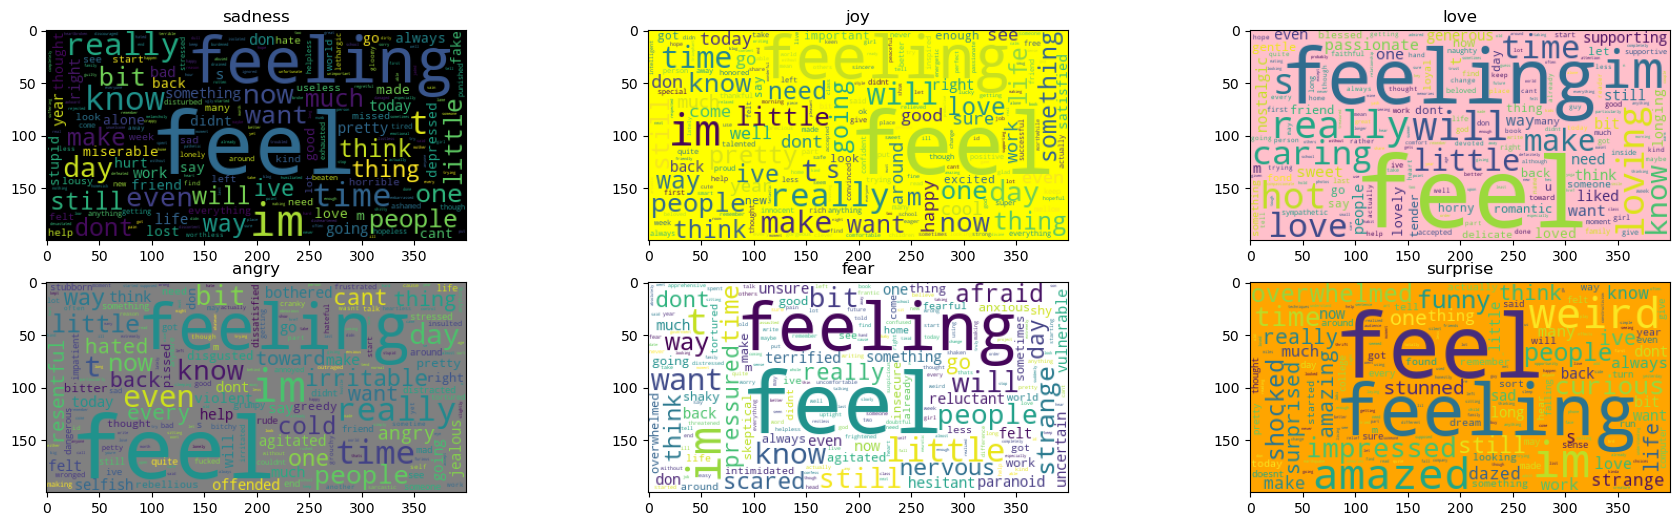

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axc = plt.subplots(2, 3, figsize=(22, 6)) # num of rows, num of cols
sad_wordcloud = WordCloud(collocations=False, background_color='black').generate(' '.join(sad))
joy_wordcloud = WordCloud(collocations=False, background_color='yellow').generate(' '.join(joy))
love_wordcloud = WordCloud(collocations=False, background_color='pink').generate(' '.join(love))
angry_wordcloud = WordCloud(collocations=False, background_color='gray').generate(' '.join(angry))
fear_wordcloud = WordCloud(collocations=False, background_color='white').generate(' '.join(fear))
sur_wordcloud = WordCloud(collocations=False, background_color='orange').generate(' '.join(surprise))

axc[0][0].imshow(sad_wordcloud)
axc[0][0].set_title('sadness')

axc[0][1].imshow(joy_wordcloud)
axc[0][1].set_title('joy')

axc[0][2].imshow(love_wordcloud)
axc[0][2].set_title('love')

axc[1][0].imshow(angry_wordcloud)
axc[1][0].set_title('angry')

axc[1][1].imshow(fear_wordcloud)
axc[1][1].set_title('fear')

axc[1][2].imshow(sur_wordcloud)
axc[1][2].set_title('surprise')



plt.show()

In [84]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

import nltk
nltk.download('punkt')
nltk.download('wordnet')



def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)


def stem_text(text):
    ps = PorterStemmer()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return  text    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mass\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mass\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [85]:
new_data['text'] = new_data['text'].apply(lambda x : re.sub('[^a-zA-Z]', ' ', x))
new_data['text'] = new_data['text'].apply(lambda x : x.lower())

new_data['text'] = new_data['text'].apply(lambda x : lemmatize_text(x))
new_data['text'] = new_data['text'].apply(lambda x : stem_text(x))

new_data['text'] 

0                               ive made week feel beaten
1                                 feel strategi worthwhil
2                   feel worthless weak doe say want find
3                                         feel clever nov
4                            im move ive feel kind gloomi
                              ...                        
3403                                feel distress suffici
3404    feel kind thing logan would admir last person ...
3405                 feel artist href http boredwithquinn
3406    feel like ive reach point emot damag health fi...
3407    felt toward dad grow think eerili parallel fee...
Name: text, Length: 3408, dtype: object

In [86]:
new_data.drop_duplicates(subset=['text'], inplace=True)
new_data['text']

0                               ive made week feel beaten
1                                 feel strategi worthwhil
2                   feel worthless weak doe say want find
3                                         feel clever nov
4                            im move ive feel kind gloomi
                              ...                        
3403                                feel distress suffici
3404    feel kind thing logan would admir last person ...
3405                 feel artist href http boredwithquinn
3406    feel like ive reach point emot damag health fi...
3407    felt toward dad grow think eerili parallel fee...
Name: text, Length: 3398, dtype: object

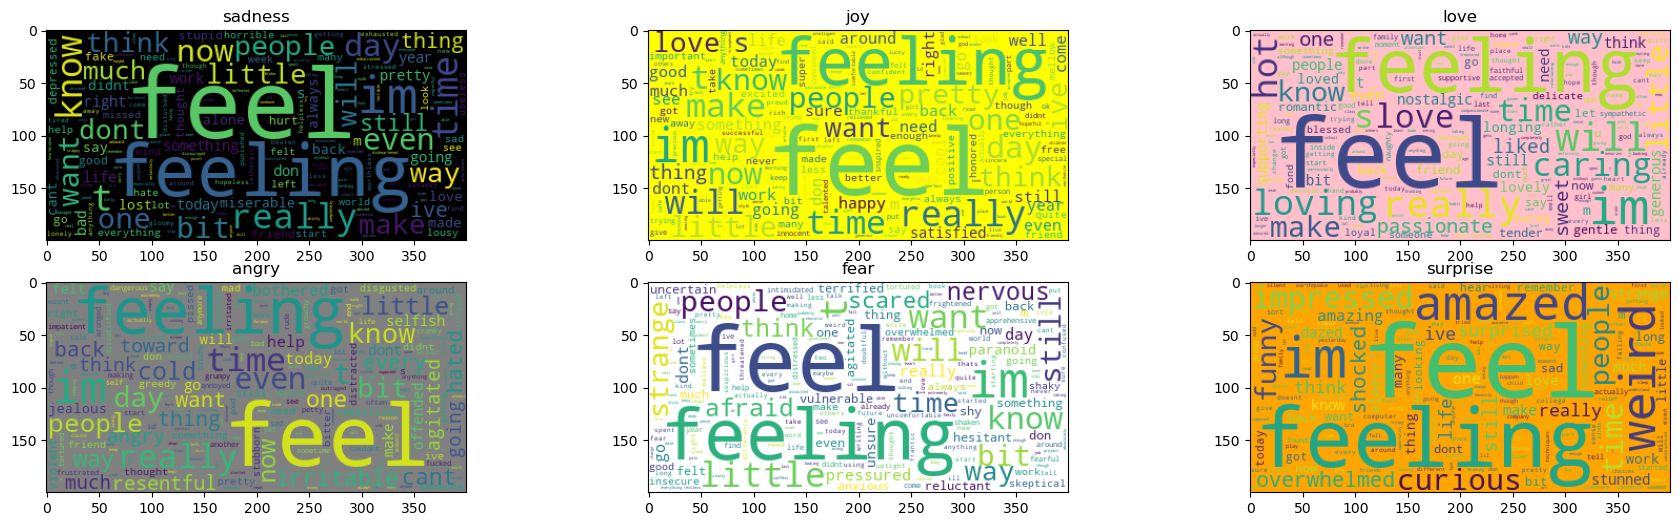

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axc = plt.subplots(2, 3, figsize=(22, 6)) # num of rows, num of cols
sad_wordcloud = WordCloud(collocations=False, background_color='black').generate(' '.join(sad))
joy_wordcloud = WordCloud(collocations=False, background_color='yellow').generate(' '.join(joy))
love_wordcloud = WordCloud(collocations=False, background_color='pink').generate(' '.join(love))
angry_wordcloud = WordCloud(collocations=False, background_color='gray').generate(' '.join(angry))
fear_wordcloud = WordCloud(collocations=False, background_color='white').generate(' '.join(fear))
sur_wordcloud = WordCloud(collocations=False, background_color='orange').generate(' '.join(surprise))

axc[0][0].imshow(sad_wordcloud)
axc[0][0].set_title('sadness')

axc[0][1].imshow(joy_wordcloud)
axc[0][1].set_title('joy')

axc[0][2].imshow(love_wordcloud)
axc[0][2].set_title('love')

axc[1][0].imshow(angry_wordcloud)
axc[1][0].set_title('angry')

axc[1][1].imshow(fear_wordcloud)
axc[1][1].set_title('fear')

axc[1][2].imshow(sur_wordcloud)
axc[1][2].set_title('surprise')



plt.show()

In [88]:
y = new_data['label']

cv = CountVectorizer(max_features=1000)
x = cv.fit_transform(new_data['text']).toarray()
x.shape

(3398, 1000)

In [89]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [90]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [91]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))


0.9981604120676968
0.7838235294117647


In [92]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))


0.9974245768947756
0.7352941176470589


c:\Users\mass\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
svm = SVC()
svm.fit(x_train, y_train)
print(svm.score(x_train, y_train))
print(svm.score(x_test, y_test))


0.9576894775570273
0.6838235294117647
